In [1]:
from fastai.vision import *

In [2]:
directory = r'D:/DeepACS/dataset'
path = Path(directory)

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['A', 'D', 'None']

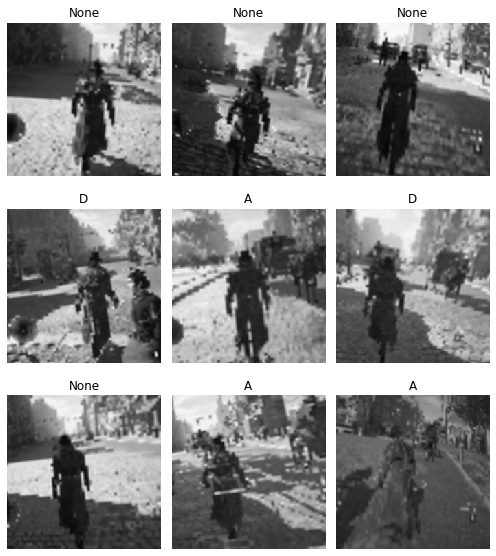

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [5]:
learn = cnn_learner(data, models.alexnet, metrics=accuracy)

In [7]:
# Freezed
learn.fit_one_cycle(24)     # 24 epochs appropriate

epoch,train_loss,valid_loss,accuracy,time
0,1.469576,0.828176,0.628306,01:42
1,1.173316,0.678587,0.702253,01:17
2,0.962141,0.603168,0.750735,01:19
3,0.856265,0.572339,0.764447,01:24
4,0.778989,0.572856,0.761508,01:22
5,0.754460,0.520226,0.786484,01:22
6,0.745390,0.505261,0.793340,01:24
7,0.710021,0.486702,0.799216,01:24
8,0.694454,0.453948,0.809501,01:24
9,0.645519,0.403129,0.843781,01:25


In [10]:
learn.save('alexnet_stage-1')

In [12]:
learn.load('alexnet_stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (8172 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
A,A,A,A,A
Path: D:\DeepACS\dataset;

Valid: LabelList (2042 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
None,A,D,A,D
Path: D:\DeepACS\dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8

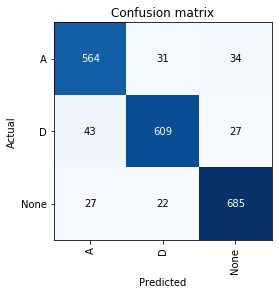

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
# Unfreezed
learn.unfreeze()        # keep epochs low
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.576346,0.581608,0.750245,01:17
1,0.565607,0.473465,0.799706,01:19
2,0.391192,0.205365,0.912831,01:23
3,0.304447,0.191756,0.921645,01:24


In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


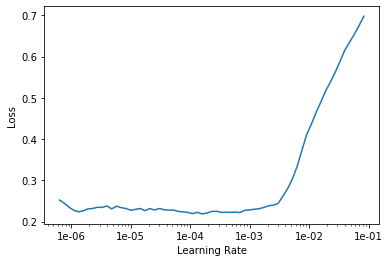

In [17]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.225470,0.122566,0.959354,01:17
1,0.204432,0.115729,0.950049,01:23
2,0.163788,0.083523,0.968168,01:23
3,0.134557,0.073982,0.969638,01:28
4,0.111831,0.064495,0.975024,01:24
5,0.099206,0.060255,0.977963,01:24


In [20]:
learn.save('alexnet_stage-2')

In [21]:
learn.load('alexnet_stage-2')

Traceback (most recent call last):
  File "C:\Users\USER\Anaconda3\envs\fastai\lib\multiprocessing\queues.py", line 230, in _feed
    close()
  File "C:\Users\USER\Anaconda3\envs\fastai\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\Users\USER\Anaconda3\envs\fastai\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid


Learner(data=ImageDataBunch;

Train: LabelList (8172 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
A,A,A,A,A
Path: D:\DeepACS\dataset;

Valid: LabelList (2042 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
None,A,D,A,D
Path: D:\DeepACS\dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8

In [23]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 55, 55]         23,296     True      
______________________________________________________________________
ReLU                 [64, 55, 55]         0          False     
______________________________________________________________________
MaxPool2d            [64, 27, 27]         0          False     
______________________________________________________________________
Conv2d               [192, 27, 27]        307,392    True      
______________________________________________________________________
ReLU                 [192, 27, 27]        0          False     
______________________________________________________________________
MaxPool2d            [192, 13, 13]        0          False     
______________________________________________________________________
Conv2d               [384, 13, 13]        663,936    True      
___________________________________________________

In [24]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.103376,0.063636,0.976004,01:17
1,0.112695,0.073345,0.975024,01:20
2,0.096346,0.052925,0.981391,01:25
3,0.076308,0.047781,0.981391,01:24


In [25]:
learn.save('alexnet_stage-3')

In [6]:
learn.load('alexnet_stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (8172 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
A,A,A,A,A
Path: D:\DeepACS\dataset;

Valid: LabelList (2042 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
None,None,None,A,None
Path: D:\DeepACS\dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)

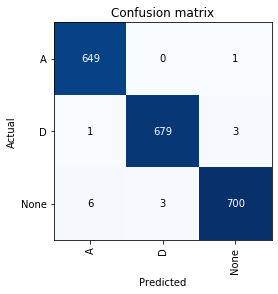

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 55, 55]         23,296     False     
______________________________________________________________________
ReLU                 [64, 55, 55]         0          False     
______________________________________________________________________
MaxPool2d            [64, 27, 27]         0          False     
______________________________________________________________________
Conv2d               [192, 27, 27]        307,392    False     
______________________________________________________________________
ReLU                 [192, 27, 27]        0          False     
______________________________________________________________________
MaxPool2d            [192, 13, 13]        0          False     
______________________________________________________________________
Conv2d               [384, 13, 13]        663,936    False     
___________________________________________________

In [9]:
learn.export()